In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

np.random.seed(42)

In [2]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      return np.maximum(np.sin(0.5*x), np.array([0]))

/var/folders/b_/3221hb491m1fjq2mgv8gdxnh0000gn/T/ipykernel_3395/1937516376.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(lambda x : np.exp(-k*F(np.array([ x ]).reshape(1, -1))), bounds[0, 0], bounds[0, 1])[0]


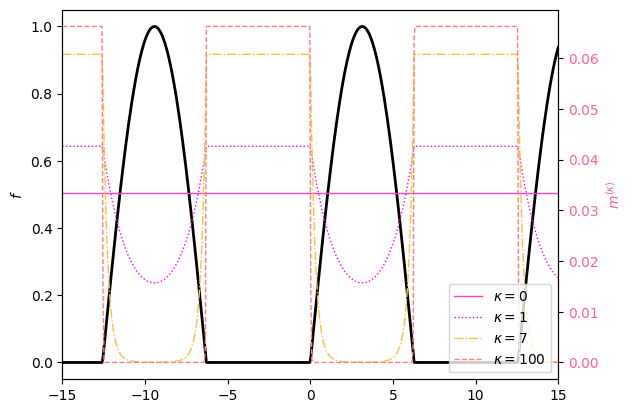

In [3]:
import matplotlib

cmap = matplotlib.colormaps["spring"]

bounds = np.array([(-15, 15)])
F = Fun()

x = np.linspace(bounds[0, 0], bounds[0, 1], 500)

fig, ax1 = plt.subplots()

color = "black"
ax1.set_ylabel("$f$", color=color)
ax1.plot(x, [F(np.array([x_i])) for x_i in x], c=(0, 0, 0), linewidth=2.0)

ax2 = ax1.twinx()

colors = [cmap(0.25), cmap(1), cmap(0.75), cmap(0.5)]

mean_color = np.zeros(4)
for c in colors:
  mean_color += np.array(c)
mean_color /= len(colors)
mean_color = tuple(mean_color)

ax2.set_ylabel("$m^{(\kappa)}$", color=mean_color)
ax2.tick_params(axis='y', labelcolor=mean_color)
line_styles = ["-", ":", "-.", "--"]
for k, c , ls in zip([0, 1, 7, 100], colors, line_styles):
  integral = quad(lambda x : np.exp(-k*F(np.array([ x ]).reshape(1, -1))), bounds[0, 0], bounds[0, 1])[0]
  m_k = lambda x : np.exp(-k*F(x)) / integral
  ax2.plot(x, [m_k(np.array([x_i])) for x_i in x], ls, c=c, label=f"$\kappa = {k}$", linewidth=1)

plt.xlim(bounds[0, 0], bounds[0, 1])
plt.legend()

plt.savefig("m_k_2d.pdf", bbox_inches="tight")